In [ ]:
import requests
from PIL import Image as img
from collections import Counter as cnt
import matplotlib.pyplot as plt
#All the required imports to run the code


class Color:
    def __init__(self):
        self.r = None
        self.g = None
        self.b = None
        self.color_name = None
#Creation of the color class and the __init__ method to initialize the r,g,b, and color_name attributes 

    def rgb_finder(self, user_image):
        jpg = img.open(user_image)
        jpg_rgb = jpg.convert('RGB')
        rgb_list = list(jpg_rgb.getdata())
        rgb_list_count = cnt(rgb_list)
        (self.r, self.g, self.b), count = rgb_list_count.most_common(1)[0]
#Creation of the rgb_finder method which helps us get the RGB units of the the most common color in jpgs
#Uses PIL so the code can open and process the jpg
#Converts jpgs to RGB mode (each pixel has its own rgb value now to represent its color)
#All the pixels get converted into a list where each RGB pixel is a tuple 
#Example: [(1,12,56), (32,45,233), etc]
#Uses Counter to count the occurances of each tuple
#Finds the highest occuranced tuple and assigns the rgb values to the previously created rgb attributes

    def color_name_finder(self):
        url = f"https://www.thecolorapi.com/id?rgb={self.r},{self.g},{self.b}&format=json"
        response = requests.get(url)
        if response.status_code == 200:
            data = response.json()
            self.color_name = data.get('name')
#Creation of the color_name_finder method which uses the preivously assigned rgb attributes to search for the name of color using thecolorapi
#Searches for the name key and assigns it to previously created color_name attribute

    def display_color_info(self):
        return f"Most Common RGB: ({self.r}, {self.g}, {self.b}), Extracted Data: {self.color_name}"
#Creation of the display_color_info class using f strings

    def plt_chart(self):
        plt.bar(['Red Units', 'Green Units', 'Blue Units'], [self.r, self.g, self.b], color=['red', 'green', 'blue'])
        plt.title("RGB Unit Visualization")
        plt.ylabel("RBG Units (0-255)")
        plt.show()
#First chart which is a visual representation of the RGB units

    def plt_chart2(self):
        plt.bar(f'RGB: ({self.r}, {self.g}, {self.b})', 1, color = (self.r/255, self.g/255, self.b/255))
        plt.title("RGB Color Visualization")
        plt.yticks([])
        plt.show()
#Second chart which is a visual representation of the found color

Most Common RGB: (255, 255, 255), Extracted Data: {'value': 'White', 'closest_named_hex': '#FFFFFF', 'exact_match_name': True, 'distance': 0}


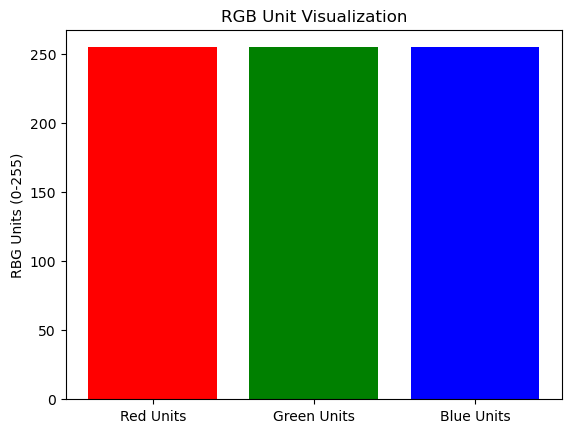

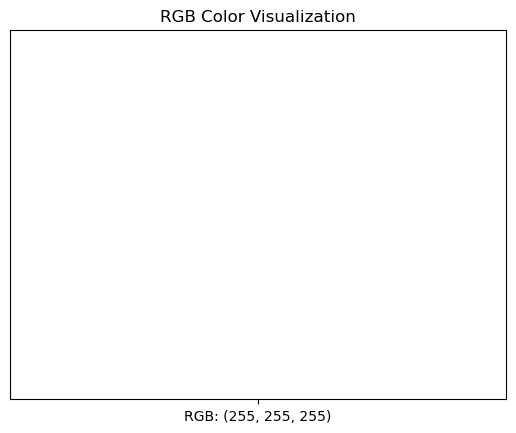

In [4]:
class Process_User_Input(Color):
    def process_image(self):
        jpg_name = input('Input the full name of the JPG file: ')
        self.rgb_finder(jpg_name)  
        self.color_name_finder()
        print(self.display_color_info())
        self.plt_chart()
        self.plt_chart2()
Instance = Process_User_Input()
Instance.process_image()

#Creation of child class called Process_User_Input
#Practices inheritence by utilizing methods & attributes from Color Class
#New Method called process_image which lets the user input the name of their jpg file
#Calls on all the inherited methods

#Creation of an instance so we can use the classes methods and attributes
#Uses the Process_image method within Instance